In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#### Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [140]:
bank_df=pd.read_csv("C:\\Users\\amvi\\Downloads\\bank_marketing_part1_Data.csv")

#### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [141]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [142]:
bank_df.shape

(210, 7)

In [143]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [144]:
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

#####    Univariate analysis

- Checking the Summary Statistic:- 



In [145]:
bank_df.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,18.9880,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,16.4540,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.8993,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.2733,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,3.7865,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,5.5376,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.1850,6.5500


In [146]:
dups = bank_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

bank_df[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


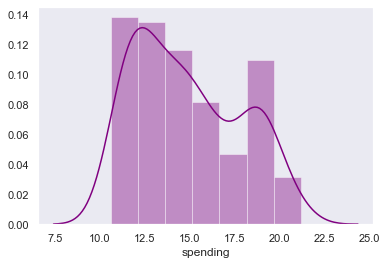

In [147]:
sns.set(style='dark',)
sns.distplot((bank_df['spending']),color='purple') 


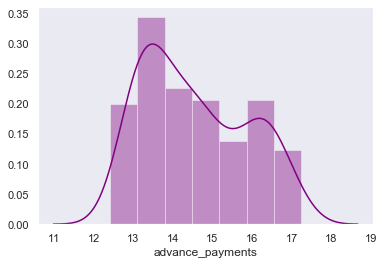

In [148]:
sns.set(style='dark',)
sns.distplot((bank_df['advance_payments']),color='purple')

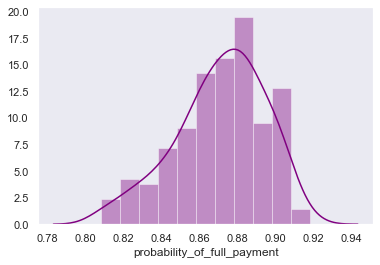

In [149]:
sns.set(style='dark',)
sns.distplot((bank_df['probability_of_full_payment']),color='purple')

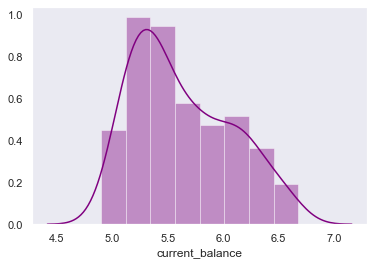

In [150]:
sns.set(style='dark',)
sns.distplot((bank_df['current_balance']),color='purple')

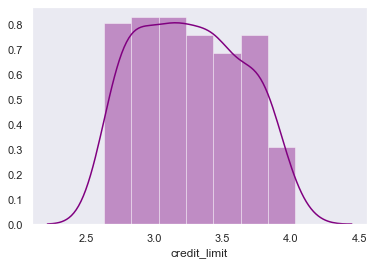

In [151]:
sns.set(style='dark',)
sns.distplot((bank_df['credit_limit']),color='purple')

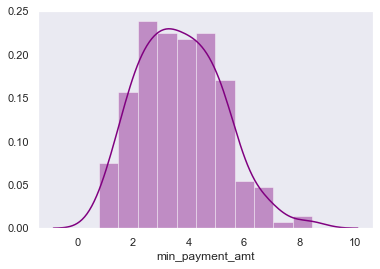

In [152]:
sns.set(style='dark',)
sns.distplot((bank_df['min_payment_amt']),color='purple')

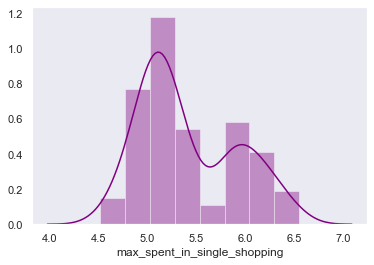

In [153]:
sns.set(style='dark',)
sns.distplot((bank_df['max_spent_in_single_shopping']),color='purple')

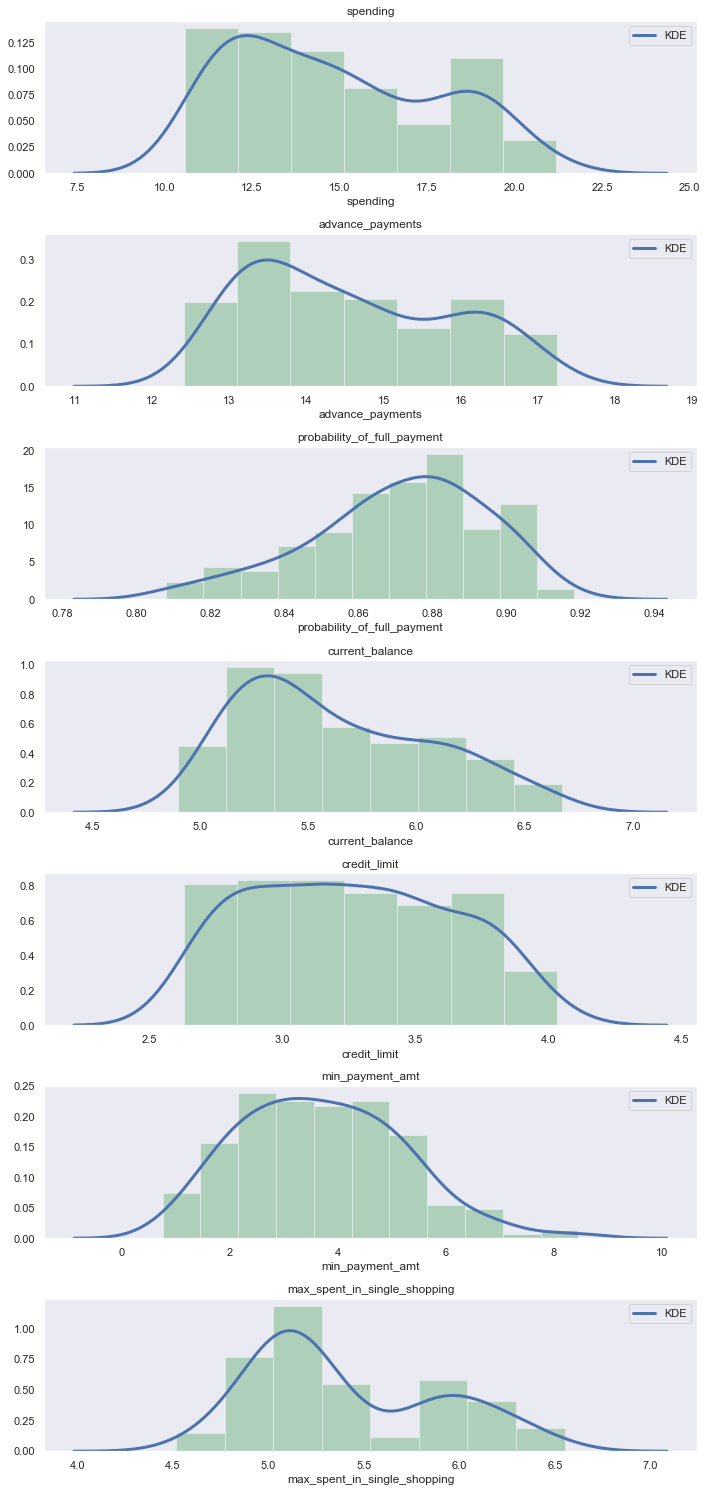

In [154]:
plt.figure(figsize=(10,50))
for i in range(len(bank_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(bank_df[bank_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(bank_df.columns[i])

plt.tight_layout()

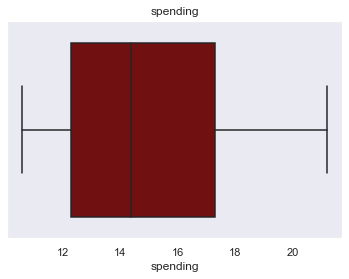

In [155]:
plt.title('spending')
sns.boxplot(bank_df['spending'],orient='horizondal',color='maroon')

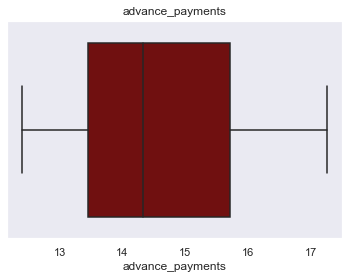

In [156]:
plt.title('advance_payments')
sns.boxplot(bank_df['advance_payments'],orient='horizondal',color='maroon')

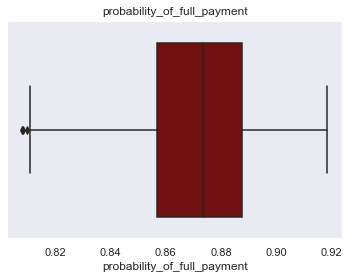

In [157]:
plt.title('probability_of_full_payment')
sns.boxplot(bank_df['probability_of_full_payment'],orient='horizondal',color='maroon')

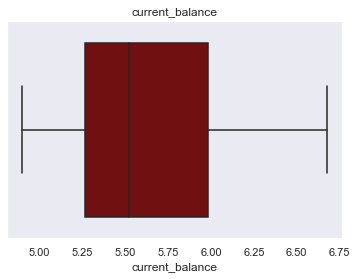

In [158]:
plt.title('current_balance')
sns.boxplot(bank_df['current_balance'],orient='horizondal',color='maroon')

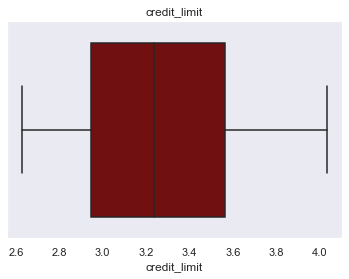

In [159]:
plt.title('credit_limit')
sns.boxplot(bank_df['credit_limit'],orient='horizondal',color='maroon')

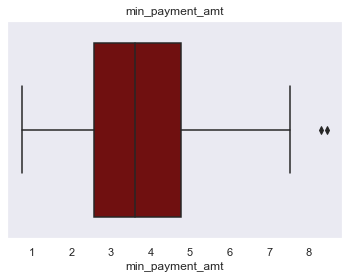

In [160]:
plt.title('min_payment_amt')
sns.boxplot(bank_df['min_payment_amt'],orient='horizondal',color='maroon')

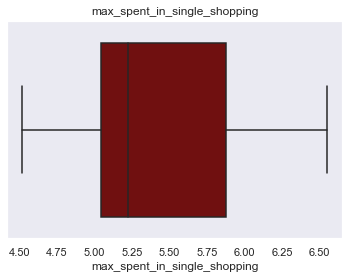

In [161]:
plt.title('max_spent_in_single_shopping')
sns.boxplot(bank_df['max_spent_in_single_shopping'],orient='horizondal',color='maroon')

In [162]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [163]:
lrprobability_of_full_payment,urprobability_of_full_payment=remove_outlier(bank_df['probability_of_full_payment'])
bank_df['probability_of_full_payment']=np.where(bank_df['probability_of_full_payment']>urprobability_of_full_payment,urprobability_of_full_payment,bank_df['probability_of_full_payment'])
bank_df['probability_of_full_payment']=np.where(bank_df['probability_of_full_payment']<lrprobability_of_full_payment,lrprobability_of_full_payment,bank_df['probability_of_full_payment'])


lrmin_payment_amt,urmin_payment_amt=remove_outlier(bank_df['min_payment_amt'])
bank_df['min_payment_amt']=np.where(bank_df['min_payment_amt']>urmin_payment_amt,urmin_payment_amt,bank_df['min_payment_amt'])
bank_df['min_payment_amt']=np.where(bank_df['min_payment_amt']<lrmin_payment_amt,lrmin_payment_amt,bank_df['min_payment_amt'])



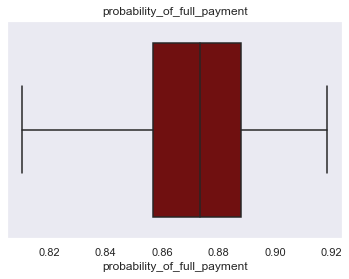

In [164]:
plt.title('probability_of_full_payment')
sns.boxplot(bank_df['probability_of_full_payment'],orient='horizondal',color='maroon')

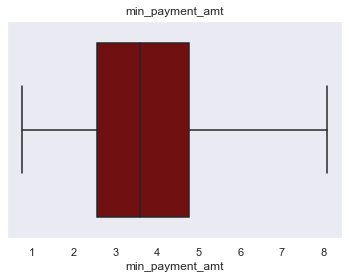

In [165]:
plt.title('min_payment_amt')
sns.boxplot(bank_df['min_payment_amt'],orient='horizondal',color='maroon')

In [166]:
bank_df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
spending                        0.399889
advance_payments                0.386573
min_payment_amt                 0.360001
credit_limit                    0.134378
probability_of_full_payment    -0.522793
dtype: float64

###### Multivariate analysis-

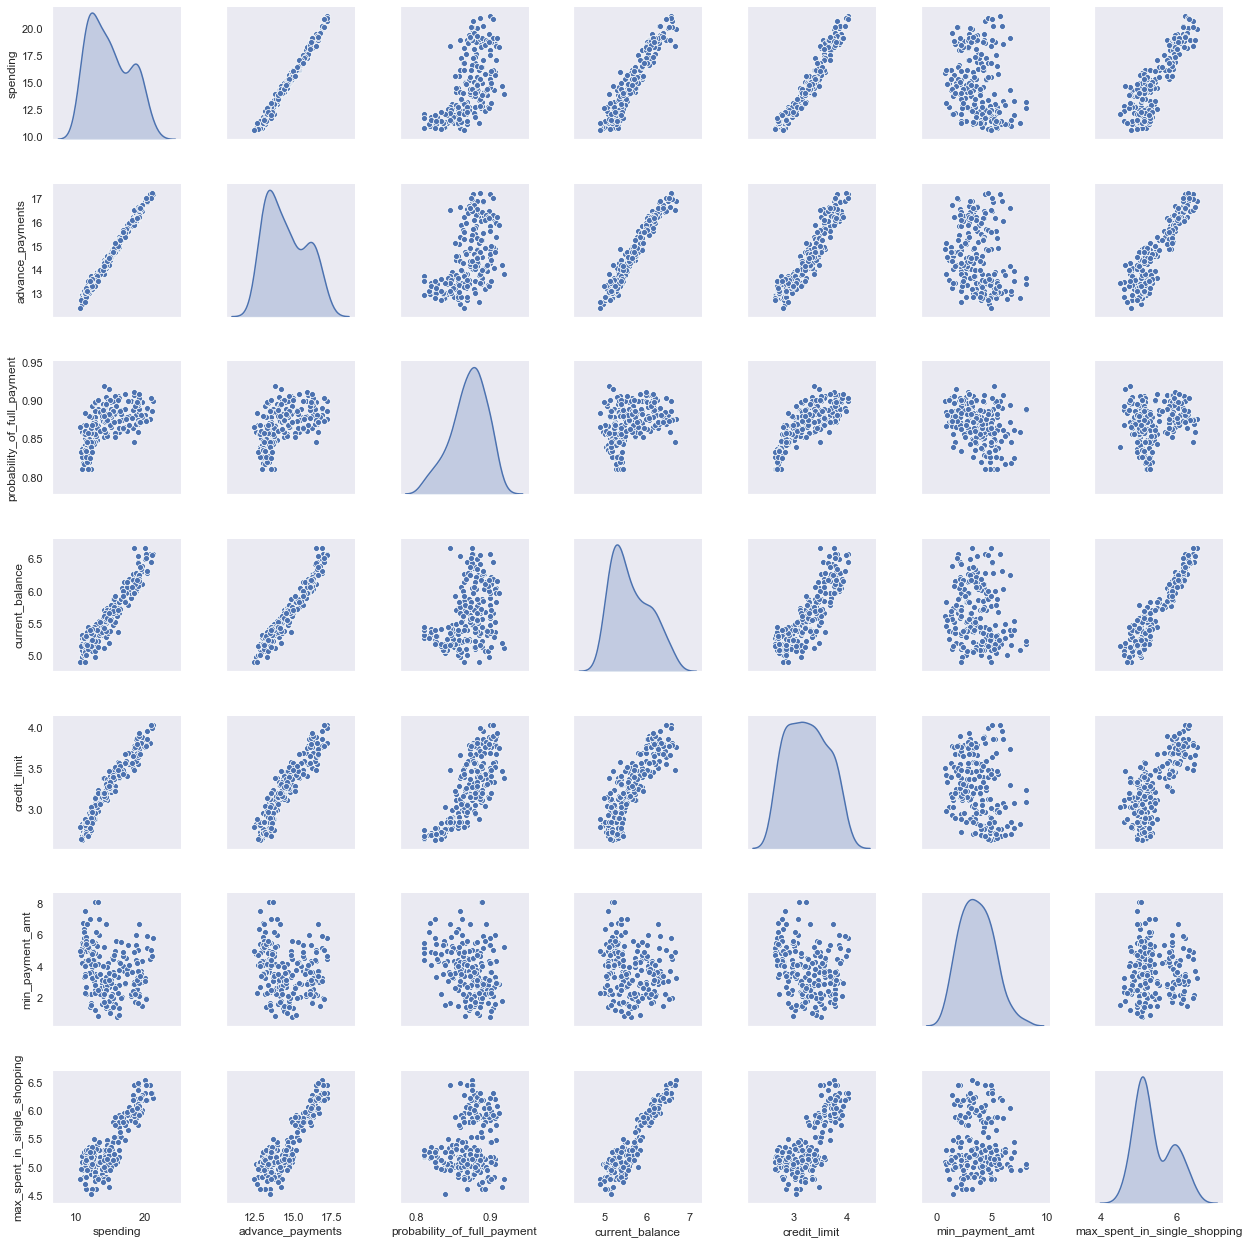

In [167]:
sns.pairplot(bank_df,diag_kind='kde');

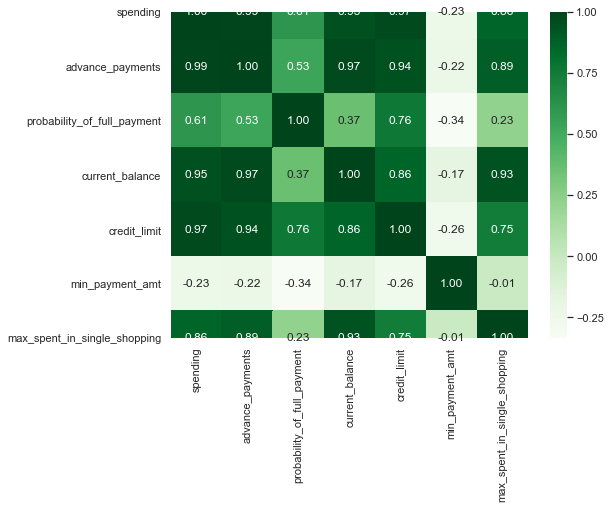

In [168]:
plt.figure(figsize=(8,6))
sns.heatmap(bank_df.corr(),annot=True,fmt=".2f",cmap="Greens")
plt.show()

In [169]:
corelate = bank_df.corr().abs() 
stack = corelate.unstack() 
sorting = stack.sort_values(ascending=False)
sorting=sorting[(sorting<1) & (sorting>0.3)].drop_duplicates().to_frame() 
sorting.columns = ['correlation']
sorting

,,correlation
spending,advance_payments,0.994341
advance_payments,current_balance,0.972422
credit_limit,spending,0.970771
spending,current_balance,0.949985
credit_limit,advance_payments,0.944829
max_spent_in_single_shopping,current_balance,0.932806
advance_payments,max_spent_in_single_shopping,0.890784
spending,max_spent_in_single_shopping,0.863693
current_balance,credit_limit,0.860415
probability_of_full_payment,credit_limit,0.762218


# 1.2  Do you think scaling is necessary for clustering in this case? Justify

Yes Scaling is necessary as often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set spending, advance_payments are in different values and this may get more weightage. Since the data in these variables are of different scales, it is tough to compare these variables.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

In this method, we convert variables with different scales of measurements into a single scale.



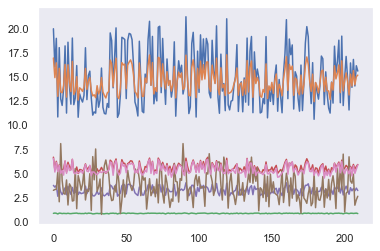

In [170]:
# Before scaling
plt.plot(bank_df)
plt.show()

In [171]:
from scipy.stats import zscore
Scaledbank_df =bank_df.apply(zscore)
Scaledbank_df.head()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


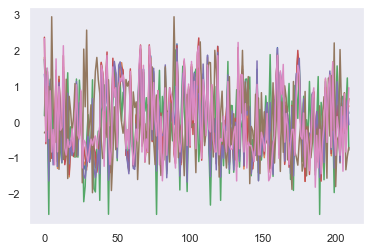

In [172]:
# After scaling
plt.plot(Scaledbank_df)
plt.show()

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

# First Method"Ward Method"

In [173]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [174]:
wardlink = linkage(Scaledbank_df, method = 'ward')

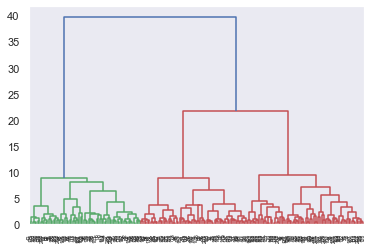

In [175]:
dend_ward = dendrogram(wardlink)

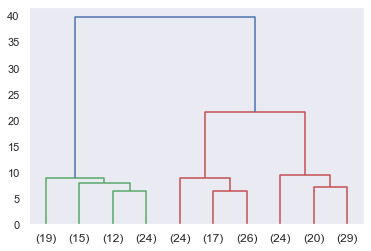

In [176]:
dend_ward = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [177]:
from scipy.cluster.hierarchy import fcluster

In [178]:
clusters_wdlk_3 = fcluster(wardlink, 3, criterion='maxclust')
clusters_wdlk_3

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [179]:
bank_df['wardlink'] = clusters_wdlk_3

In [180]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,wardlink
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [181]:
bank_df['wardlink'] .value_counts().sort_index()

1    70
2    67
3    73
Name: wardlink, dtype: int64

In [182]:
aggdata_ward=bank_df.groupby('wardlink').mean()
aggdata_ward['Freq']=bank_df['wardlink'].value_counts().sort_index()
aggdata_ward

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
wardlink,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [183]:
aggdata_ward.T

wardlink,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848155,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.940302,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Freq,70.000000,67.000000,73.000000


<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

# Second method "Average Method"

In [185]:
link_average = linkage(Scaledbank_df, method = 'average')

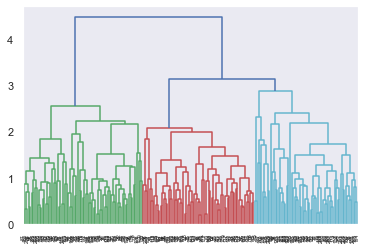

In [186]:
dend_average = dendrogram(link_average)

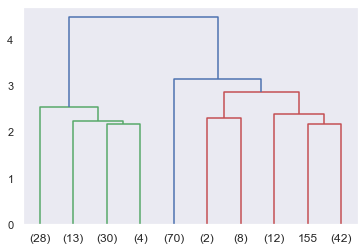

In [187]:
dend_average = dendrogram(link_average,
                 truncate_mode='lastp',
                 p = 10)

In [188]:
clusters_average_3 = fcluster(link_average, 3, criterion='maxclust')
clusters_average_3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [189]:
bank_df['link_average'] = clusters_average_3

In [190]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,wardlink,link_average
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1


In [191]:
bank_df['link_average'] .value_counts().sort_index()

1    75
2    70
3    65
Name: link_average, dtype: int64

In [192]:
aggdata_avg=bank_df.groupby('link_average').mean()
aggdata_avg['Freq']=bank_df['link_average'].value_counts().sort_index()
aggdata_avg

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,wardlink,Freq
link_average,,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,1.213333,75
2,11.916857,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071,2.114286,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569,2.830769,65


In [193]:
aggdata_avg.T

link_average,1,2,3
spending,18.129200,11.916857,14.217077
advance_payments,16.058000,13.291000,14.195846
probability_of_full_payment,0.881595,0.846845,0.884869
current_balance,6.135747,5.258300,5.442000
credit_limit,3.648120,2.846000,3.253508
min_payment_amt,3.650200,4.619000,2.759007
max_spent_in_single_shopping,5.987040,5.115071,5.055569
wardlink,1.213333,2.114286,2.830769
Freq,75.000000,70.000000,65.000000


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [194]:
from sklearn.cluster import KMeans

In [195]:
k_means = KMeans(n_clusters = 3)
k_means.fit(Scaledbank_df)
k_means.inertia_

430.298481751223

In [196]:
#Forming clusters with K = 1,3,4,5,6 and comparing the WSS
k_means = KMeans(n_clusters = 1)
k_means.fit(Scaledbank_df)
k_means.inertia_

1469.9999999999998

In [197]:
k_means = KMeans(n_clusters = 2)
k_means.fit(Scaledbank_df)
k_means.inertia_

659.1474009548498

In [198]:
k_means = KMeans(n_clusters = 4)
k_means.fit(Scaledbank_df)
k_means.inertia_

371.221763926848

In [199]:
k_means = KMeans(n_clusters = 5)
k_means.fit(Scaledbank_df)
k_means.inertia_

327.2466104066809

In [200]:
#Calculating WSS for other values of K - Elbow Method
wss =[] 

In [201]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(Scaledbank_df)
    wss.append(KM.inertia_)

In [202]:
wss

[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 371.221763926848,
 326.8846407681858,
 290.15133123739645,
 263.0291032947617,
 242.8107073317113,
 221.4875969822111,
 206.32904650770408]

WSS reduces as K keeps increasing

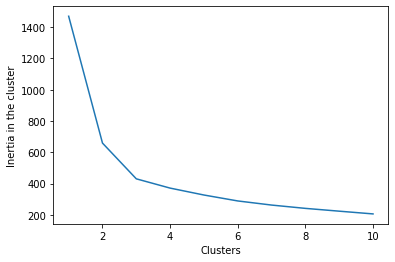

In [60]:
# Elbow plot
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [61]:
k_means = KMeans(n_clusters = 3)
k_means.fit(Scaledbank_df)
labels = k_means.labels_

In [62]:
#Cluster evaluation for 3 clusters: the silhouette score

from sklearn.metrics import silhouette_samples, silhouette_score

In [63]:
silhouette_score(Scaledbank_df,labels,random_state=1)

0.4007270552751299

In [64]:
#KMeans with K=4
k_means = KMeans(n_clusters = 4)
k_means.fit(Scaledbank_df)
labels = k_means.labels_

In [65]:
silhouette_score(Scaledbank_df,labels,random_state=1)

0.32757426605518075

silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3

In [66]:
#3 Cluster Solution

In [136]:
km_3 = KMeans(n_clusters=3,random_state=45)

In [74]:
#fitting the Kmeans 
km_3.fit(Scaledbank_df)
km_3.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [127]:
#proportion of labels classified

pd.Series(km_3.labels_).value_counts().sort_index()

0    67
1    72
2    71
dtype: int64

In [128]:
km_3.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [130]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 45)
y_kmeans = kmeans.fit_predict(Scaledbank_df)


In [138]:
kmean_cluster = pd.DataFrame(y_kmeans)

In [139]:
bank_df['kmean_cluster'] = kmean_cluster

In [141]:
aggdata_kmeans=pd.DataFrame(round(bank_df.groupby('kmean_cluster').mean(),1))
aggdata_kmeans['Frequency']=bank_df['kmean_cluster'].value_counts().sort_index()
aggdata_kmeans


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,wardlink,link_average,cluster,Frequency
kmean_cluster,,,,,,,,,,,
0,18.5,16.2,0.9,6.2,3.7,3.6,6.0,1.0,1.0,0.0,67
1,11.9,13.2,0.8,5.2,2.8,4.7,5.1,2.1,2.1,1.0,72
2,14.4,14.3,0.9,5.5,3.3,2.7,5.1,2.9,2.7,2.0,71


In [137]:
aggdata_kmeans.T

cluster,0,1,2
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1
wardlink,1.0,2.1,2.9
link_average,1.0,2.1,2.7
Frequency,67.0,72.0,71.0


## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

### 2-CART-RF-ANN

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations


#### Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10.Age of insured (Age)

In [4]:
insurance_df = pd.read_csv("C:\\Users\\amvi\\Downloads\\insurance_part2_data.csv")

In [5]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


- 10 variables
- Age, Commision, Duration, Sales are numeric variable
- rest are categorial variables
- 3000 records, no missing one
- 9 independant variable and one target variable - Clamied

In [7]:
insurance_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [8]:
insurance_df.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,53.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,48.300,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,224.200,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,172.025,539.00


In [9]:
insurance_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
insurance_df.shape

(3000, 10)

In [11]:
#Geting unique counts of all Nominal Variables
for column in insurance_df[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',insurance_df[column].nunique())
    print(insurance_df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [12]:
dups = insurance_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
insurance_df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [13]:
insurance_df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

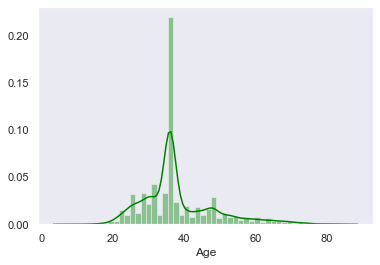

In [14]:
#Univariate Analysis of continous variables-

sns.set(style='dark',)
sns.distplot((insurance_df['Age']),color='green')

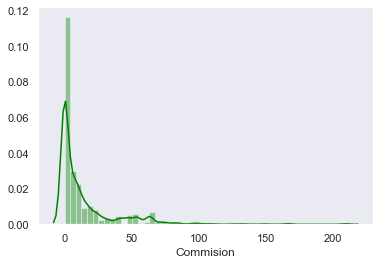

In [15]:
sns.set(style='dark',)
sns.distplot((insurance_df['Commision']),color='green')

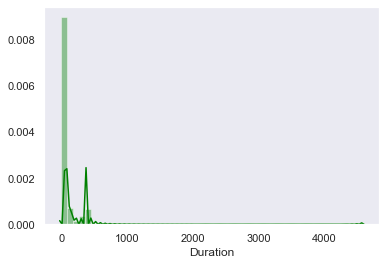

In [16]:
sns.set(style='dark',)
sns.distplot((insurance_df['Duration']),color='green')

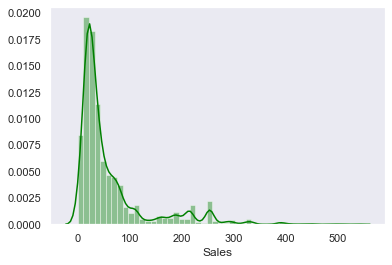

In [17]:
sns.set(style='dark',)
sns.distplot((insurance_df['Sales']),color='green')

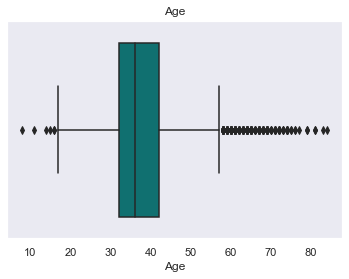

In [18]:
plt.title('Age')
sns.boxplot(insurance_df['Age'],orient='horizondal',color='teal')

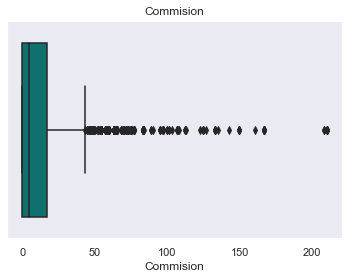

In [19]:
plt.title('Commision')
sns.boxplot(insurance_df['Commision'],orient='horizondal',color='teal')

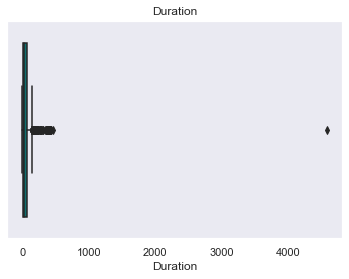

In [20]:
plt.title('Duration')
sns.boxplot(insurance_df['Duration'],orient='horizondal',color='teal')

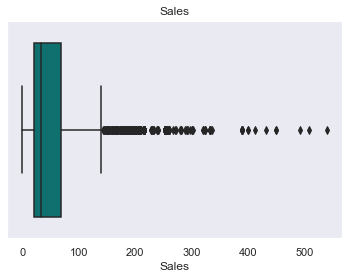

In [21]:
plt.title('Sales')
sns.boxplot(insurance_df['Sales'],orient='horizondal',color='teal')

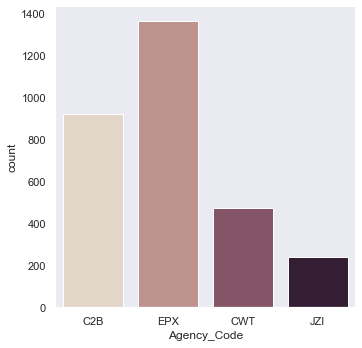

In [22]:
#distribution of categorical variable
sns.catplot(x="Agency_Code", kind="count", palette="ch:.25", data=insurance_df)

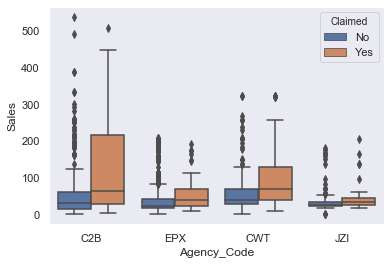

In [23]:
sns.boxplot(data = insurance_df, x='Agency_Code',y='Sales', hue='Claimed')

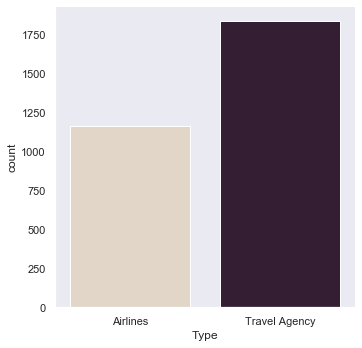

In [332]:
sns.catplot(x="Type", kind="count", palette="ch:.25", data=insurance_df)

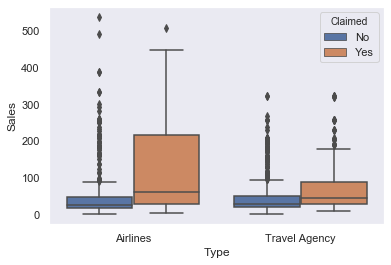

In [333]:
sns.boxplot(data = insurance_df, x='Type',y='Sales', hue='Claimed')

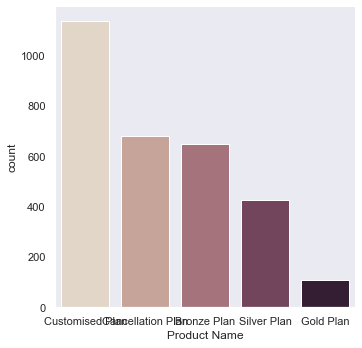

In [334]:
sns.catplot(x="Product Name", kind="count", palette="ch:.25", data=insurance_df)

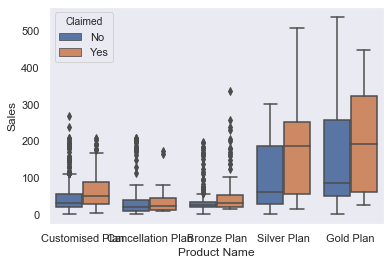

In [335]:
sns.boxplot(data = insurance_df, x='Product Name',y='Sales', hue='Claimed')

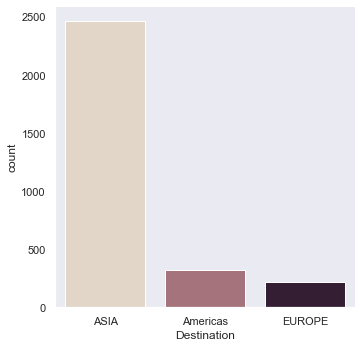

In [336]:
sns.catplot(x="Destination", kind="count", palette="ch:.25", data=insurance_df)

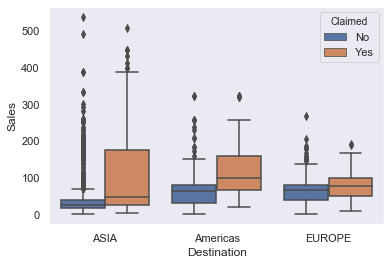

In [337]:
sns.boxplot(data = insurance_df, x='Destination',y='Sales', hue='Claimed')

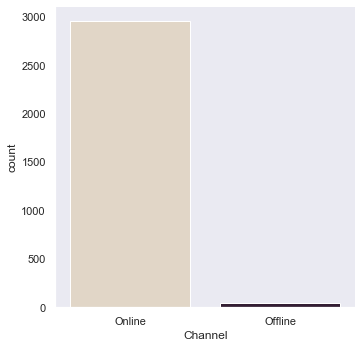

In [338]:
sns.catplot(x="Channel", kind="count", palette="ch:.25", data=insurance_df)

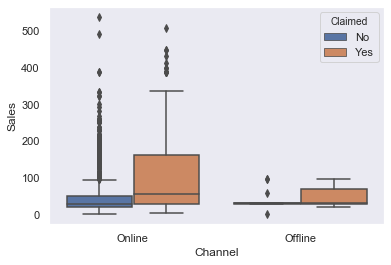

In [339]:
sns.boxplot(data = insurance_df, x='Channel',y='Sales', hue='Claimed')

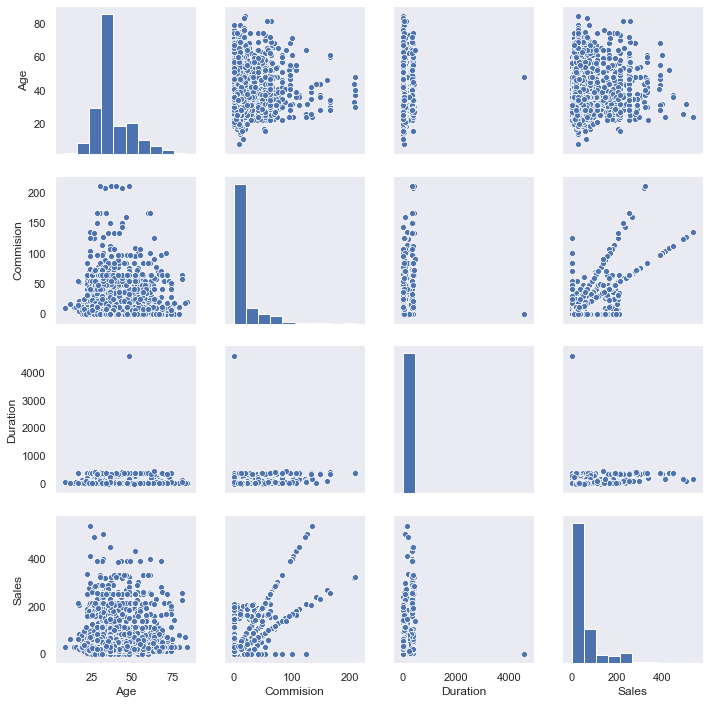

In [340]:
#Mulivariate analysis of the continuous variables
sns.pairplot(insurance_df[['Age', 'Commision', 
    'Duration', 'Sales']])


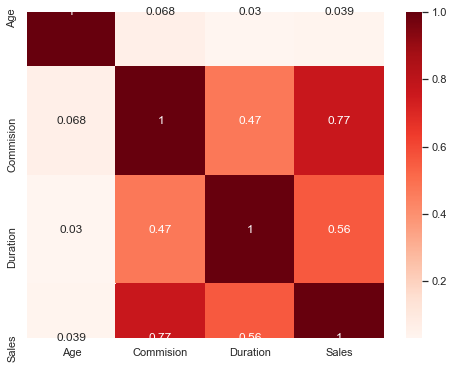

In [341]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1)
sns.heatmap(insurance_df[['Age', 'Commision', 
    'Duration', 'Sales']].corr(), annot=True,cmap="Reds")

In [342]:
#Converting all objects to categorical codes
for feature in insurance_df.columns: 
    if insurance_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(insurance_df[feature].unique()))
        print(pd.Categorical(insurance_df[feature].unique()).codes)
        insurance_df[feature] = pd.Categorical(insurance_df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [343]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [344]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [345]:
#Proportion of 1s and 0s
insurance_df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

##### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural NetworkExtracting the target column into separate vectors for training set and test set

In [346]:
X = insurance_df.drop("Claimed", axis=1)

y = insurance_df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network



# Building a Decision Tree Model

In [347]:
from sklearn.model_selection import train_test_split


In [348]:

#Splitting data into training and test set
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [349]:
#Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [350]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [351]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [352]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

#link for graph
#http://webgraphviz.com/

In [353]:
#Variable Importance
print(
    pd.DataFrame(best_grid.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                   Imp
Agency_Code   0.599363
Sales         0.255785
Product Name  0.056555
Duration      0.037945
Age           0.030261
Commision     0.012676
Type          0.007416
Channel       0.000000
Destination   0.000000


In [354]:
#Predicting on Training and Test dataset
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [355]:
#Getting the Predicted Classes and Probability
ytrain_predict

array([0, 0, 1, ..., 0, 0, 1], dtype=int8)

In [356]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.935714,0.064286
1,0.529412,0.470588
2,0.358621,0.641379
3,0.234783,0.765217
4,0.924242,0.075758


In [357]:
pred12 = pd.DataFrame(ytest_predict_prob)
predclass = np.where(pred12[1]> 0.25, 1, 0)
predclass

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,

# Building a Random Forest Classifier

In [294]:
#Grid Search for finding out the optimal values for the hyper parameters Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will have higher execution time, so the best values that came after the search are directly put in Param_grid.
param_grid = {
    'max_depth': [10,12],## 20,30,40
    'max_features': [4,8],## 7,8,9
    'min_samples_leaf': [35],## 50,100
    'min_samples_split': [100], ## 60,70
    'n_estimators': [101] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [295]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 12], 'max_features': [4, 8],
                         'min_samples_leaf': [35], 'min_samples_split': [100],
                         'n_estimators': [101]})

In [296]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 35,
 'min_samples_split': 100,
 'n_estimators': 101}

In [297]:
best_grid = grid_search.best_estimator_

In [298]:
best_grid

RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=35,
                       min_samples_split=100, n_estimators=101, random_state=1)

In [299]:
#Predicting the Training and Testing data
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [300]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.762864,0.237136
1,0.491325,0.508675
2,0.473163,0.526837
3,0.250904,0.749096
4,0.927374,0.072626


# Building ANN model

In [301]:
#I scaled the data before performing ANN 
from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


In [302]:
param_grid = {
    'hidden_layer_sizes': [8], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam', 'sgd'], #sgd
    'tol': [0.001, 0.0001], # ETA (Learning Rate)
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [303]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 8, 'max_iter': 2500, 'solver': 'sgd', 'tol': 0.001}

In [304]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=8, max_iter=2500, random_state=1, solver='sgd',
              tol=0.001)

In [305]:
#Predicting the Training and Testing data
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [306]:
#Getting the Predicted Classes and Probs
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.500749,0.499251
1,0.816226,0.183774
2,0.708391,0.291609
3,0.500749,0.499251
4,0.841565,0.158435


# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

#### CART Performance Matrix

AUC: 0.779


Text(0, 0.5, 'True Positive Rate')

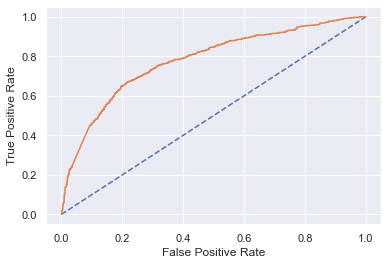

In [307]:
#Model Evaluation
#AUC and ROC for the training data
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

AUC: 0.740


Text(0, 0.5, 'True Positive Rate')

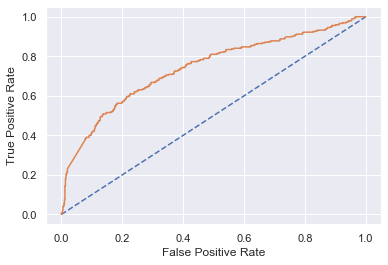

In [308]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [309]:
#Confusion Matrix for the training data
confusion_matrix(train_labels, ytrain_predict)

array([[1418,   53],
       [ 472,  157]], dtype=int64)

In [118]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.75

In [119]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1471
           1       0.75      0.25      0.37       629

    accuracy                           0.75      2100
   macro avg       0.75      0.61      0.61      2100
weighted avg       0.75      0.75      0.70      2100



In [120]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
insurance_df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(insurance_df.loc["1"][2],2)
cart_train_recall=round(insurance_df.loc["1"][1],2)
cart_train_precision=round(insurance_df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.75
cart_train_recall  0.25
cart_train_f1  0.37


In [121]:
#Confusion Matrix for test data
confusion_matrix(test_labels, ytest_predict)

array([[593,  12],
       [227,  68]], dtype=int64)

In [122]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7344444444444445

In [123]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       605
           1       0.85      0.23      0.36       295

    accuracy                           0.73       900
   macro avg       0.79      0.61      0.60       900
weighted avg       0.76      0.73      0.68       900



In [124]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
insurance_df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(insurance_df.loc["1"][0],2)
cart_test_recall=round(insurance_df.loc["1"][1],2)
cart_test_f1=round(insurance_df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.85
cart_test_recall  0.23
cart_test_f1  0.36


####  Random Forest  Performance Matrix

In [126]:
#RF Model Performance Evaluation on Training data
confusion_matrix(train_labels,ytrain_predict)

array([[1418,   53],
       [ 472,  157]], dtype=int64)

In [127]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.75

In [128]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1471
           1       0.75      0.25      0.37       629

    accuracy                           0.75      2100
   macro avg       0.75      0.61      0.61      2100
weighted avg       0.75      0.75      0.70      2100



In [129]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
insurance_df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(insurance_df.loc["1"][0],2)
rf_train_recall=round(insurance_df.loc["1"][1],2)
rf_train_f1=round(insurance_df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.75
rf_train_recall  0.25
rf_train_f1  0.37


In [2]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

NameError: name 'roc_curve' is not defined

In [131]:
#RF Model Performance Evaluation on Test data
confusion_matrix(test_labels,ytest_predict)

array([[593,  12],
       [227,  68]], dtype=int64)

In [132]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7344444444444445

In [133]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       605
           1       0.85      0.23      0.36       295

    accuracy                           0.73       900
   macro avg       0.79      0.61      0.60       900
weighted avg       0.76      0.73      0.68       900



In [134]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
insurance_df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(insurance_df.loc["1"][0],2)
rf_test_recall=round(insurance_df.loc["1"][1],2)
rf_test_f1=round(insurance_df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.85
rf_test_recall  0.23
rf_test_f1  0.36


In [1]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

NameError: name 'roc_curve' is not defined

####  Neural Network Performamce Matrix

In [137]:
#NN Model Performance Evaluation on Training data
confusion_matrix(train_labels,ytrain_predict)

array([[1418,   53],
       [ 472,  157]], dtype=int64)

In [138]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.75

In [139]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1471
           1       0.75      0.25      0.37       629

    accuracy                           0.75      2100
   macro avg       0.75      0.61      0.61      2100
weighted avg       0.75      0.75      0.70      2100



In [140]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
insurance_df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(insurance_df.loc["1"][0],2)
nn_train_recall=round(insurance_df.loc["1"][1],2)
nn_train_f1=round(insurance_df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.75
nn_train_recall  0.25
nn_train_f1  0.37


Area under Curve is 0.7785836182085233


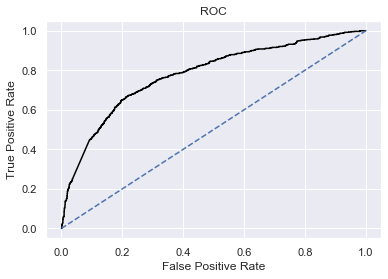

In [141]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [142]:
#NN Model Performance Evaluation on Test data
confusion_matrix(test_labels,ytest_predict)

array([[593,  12],
       [227,  68]], dtype=int64)

In [143]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7344444444444445

In [144]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       605
           1       0.85      0.23      0.36       295

    accuracy                           0.73       900
   macro avg       0.79      0.61      0.60       900
weighted avg       0.76      0.73      0.68       900



In [145]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.85
nn_test_recall  0.23
nn_test_f1  0.36


Area under Curve is 0.7400476257178876


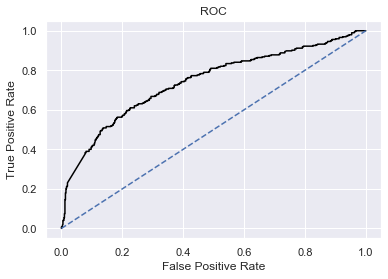

In [146]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

# 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [147]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.75,0.73,0.75,0.73,0.75,0.73
AUC,0.78,0.74,0.78,0.74,0.78,0.74
Recall,0.25,0.23,0.25,0.23,0.25,0.23
Precision,0.75,0.85,0.75,0.85,0.75,0.85
F1 Score,0.37,0.36,0.37,0.36,0.37,0.36


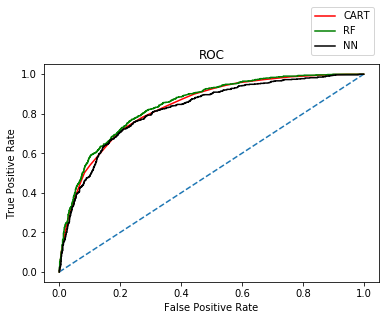

In [97]:
#ROC Curve for the 3 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

NameError: name 'rf_test_fpr' is not defined

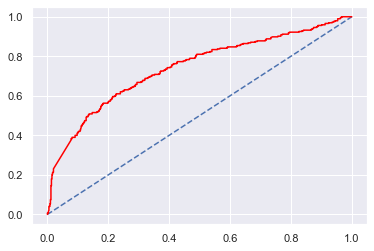

In [310]:
#ROC Curve for the 3 models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations